# Here is my first ML project concerns predictions about insurance amount



**Let start with importing libraries wcich allow to prepare data to further actions.**


In [246]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Now I import the data from single csv file.

In [249]:
df = pd.read_csv("../InsurancePrediction -1 ML model/insurance.csv")

In [251]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [255]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

**We see that our data are clear and ready to use. It means that we can skip part of handling with missing data.**




**Lets move to the Exploratory Data Analysis. First of all we want to check how our data look on some charts and also we want to check outliers.**


<Axes: xlabel='bmi', ylabel='charges'>

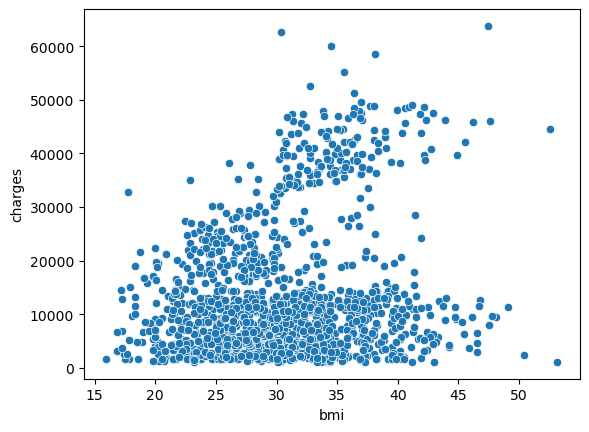

In [260]:
sns.scatterplot(data=df, x="bmi" , y="charges")

<Axes: xlabel='bmi', ylabel='charges'>

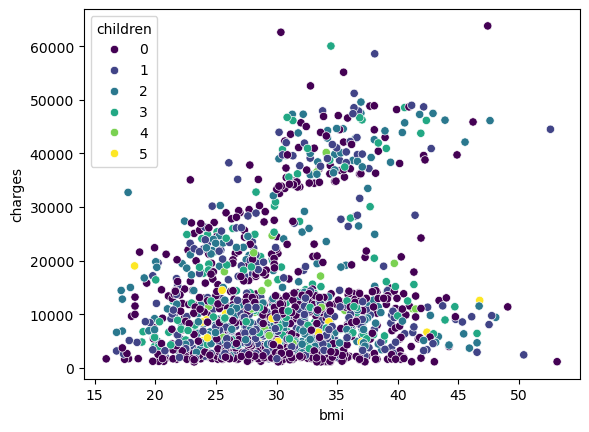

In [262]:
sns.scatterplot(data=df, x="bmi" , y="charges", hue="children", palette="viridis")

<Axes: xlabel='bmi', ylabel='charges'>

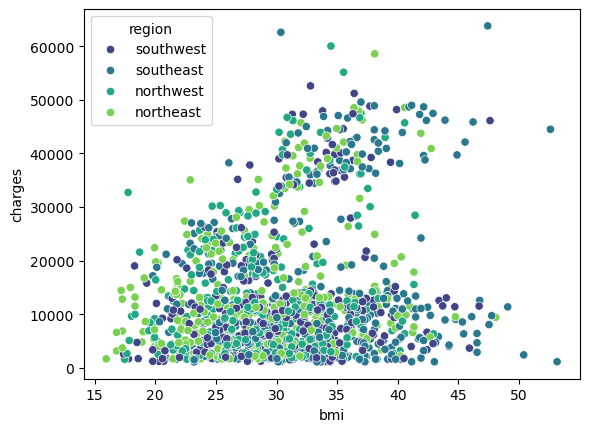

In [264]:
sns.scatterplot(data=df, x="bmi" , y="charges", hue="region", palette="viridis")

<Axes: xlabel='bmi', ylabel='charges'>

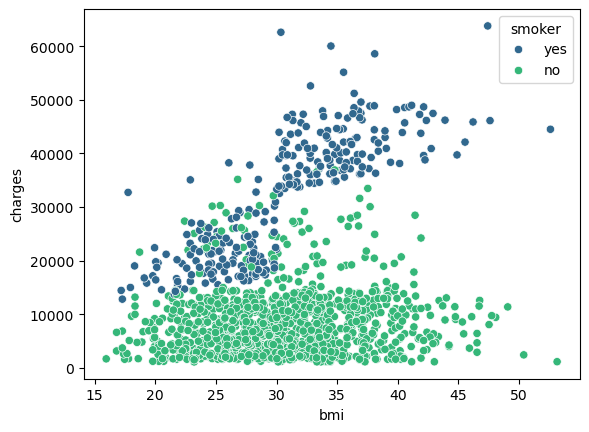

In [266]:
sns.scatterplot(data=df, x="bmi" , y="charges", hue="smoker", palette="viridis")

<Axes: xlabel='bmi', ylabel='charges'>

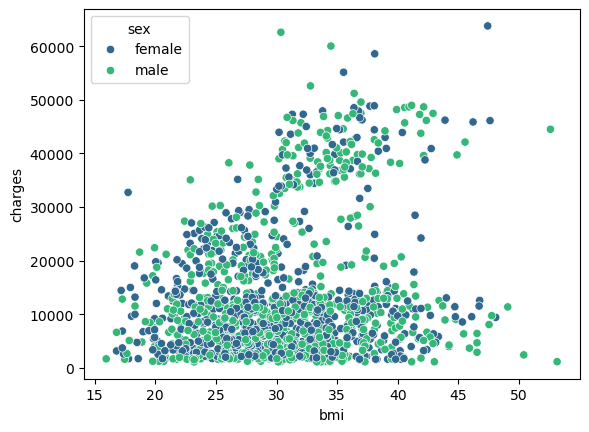

In [268]:
sns.scatterplot(data=df, x="bmi" , y="charges", hue="sex", palette="viridis")

<Axes: xlabel='age', ylabel='charges'>

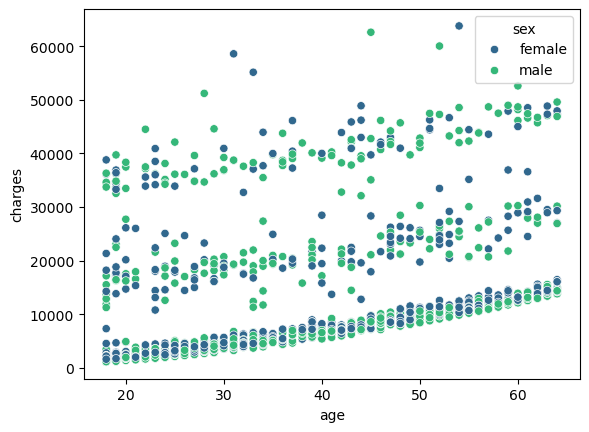

In [270]:
sns.scatterplot(data=df, x="age" , y="charges", hue="sex", palette="viridis")

<Axes: xlabel='age', ylabel='charges'>

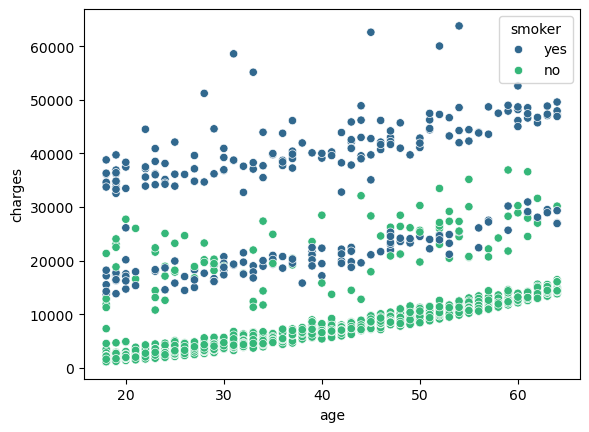

In [272]:
sns.scatterplot(data=df, x="age" , y="charges", hue="smoker", palette="viridis")

**We see the first  2 trends. People who smoke cigarettes have significantly higher insurance charges and elderly has higher insurance charges.**


**Now lets explore histograms.**


In [277]:
max(df["charges"])

63770.42801

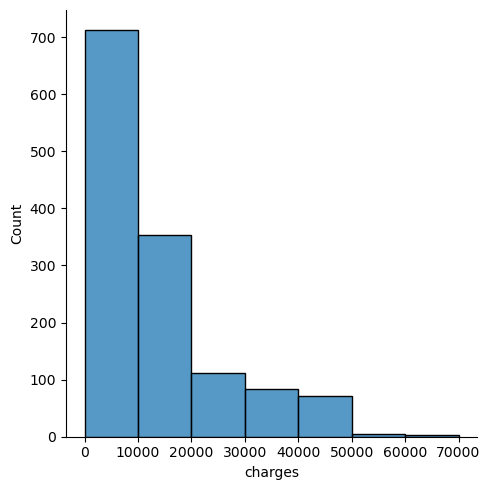

In [279]:

bins=np.arange(0,80000,10000)
bins
sns.displot(data=df, x="charges", bins=bins)

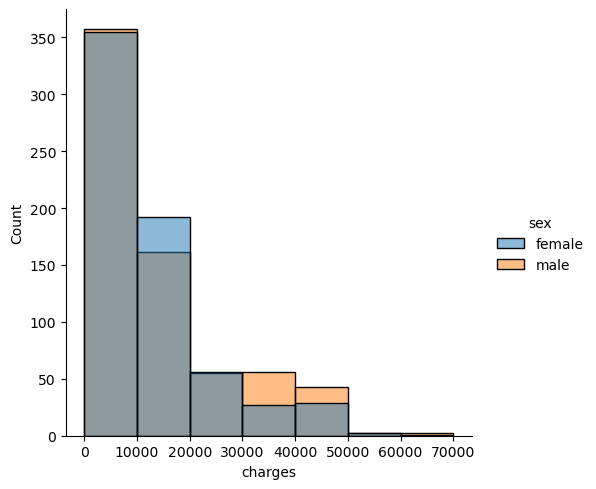

In [281]:

bins=np.arange(0,80000,10000)
bins
sns.displot(data=df, x="charges", bins=bins, hue="sex")

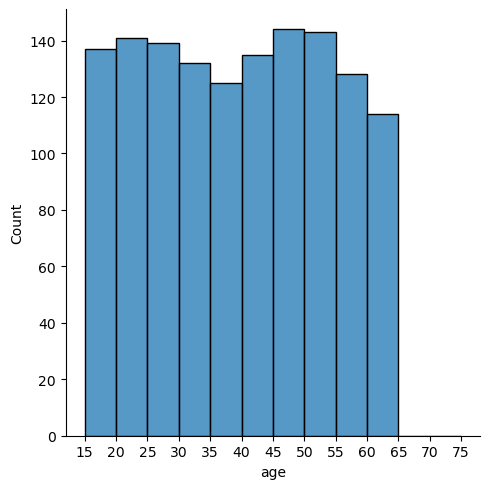

In [283]:
age=np.arange(15,80,5)
age

sns.displot(data=df, x="age", bins=age)
plt.xticks(age);

**We see, that almost half people have charges less or equal 10000. Moreover, we see that people are evenly distributed in terms of age and we don't see strong deviations in charges distributions in terms of sex.**

**Let see how boxplots looks.**

Text(0.5, 1.0, 'Charges divided by sex')

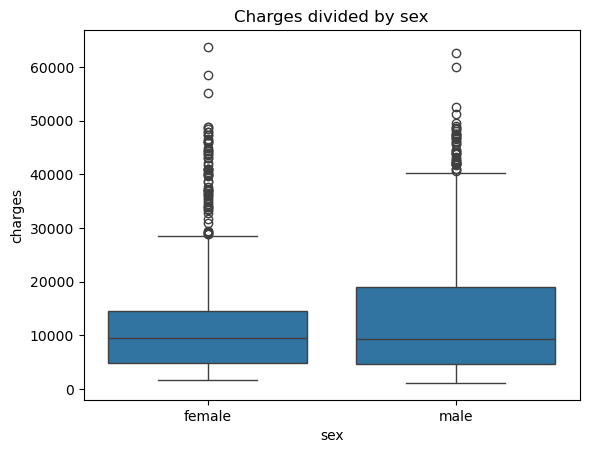

In [287]:
sns.boxplot(data=df, x="sex" , y="charges")
plt.title("Charges divided by sex")

In [289]:
smokers_data=df[df["smoker"]=="yes"]
non_smokers_data=df[df["smoker"]=="no"]

Text(0.5, 1.0, 'Smokers charges divided by sex')

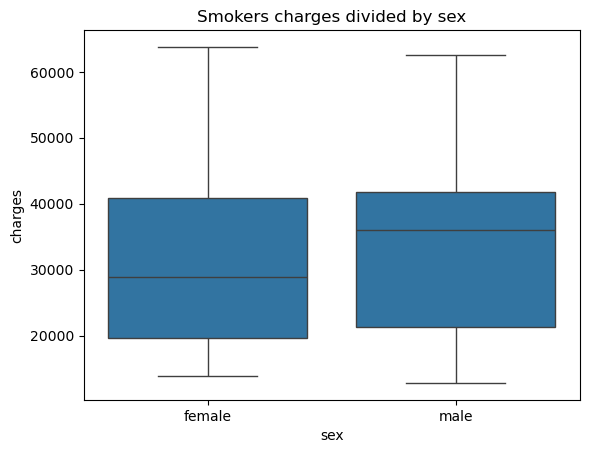

In [291]:
sns.boxplot(data=smokers_data, x="sex" , y="charges")
plt.title("Smokers charges divided by sex")

Text(0.5, 1.0, 'Non smokers charges divided by sex')

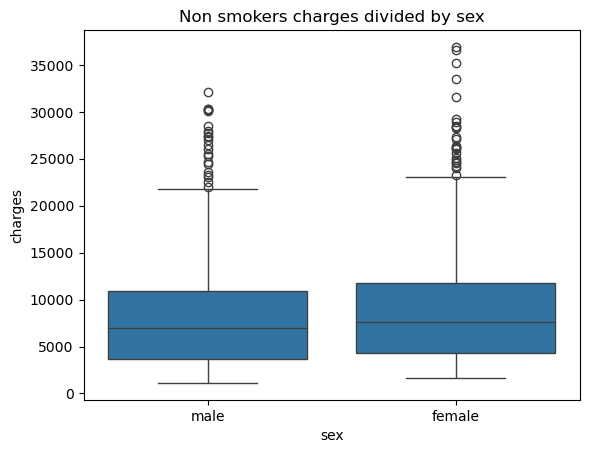

In [293]:
sns.boxplot(data=non_smokers_data, x="sex" , y="charges")
plt.title("Non smokers charges divided by sex")

Text(0.5, 1.0, 'Non smokers bmi vs charges with children number separation')

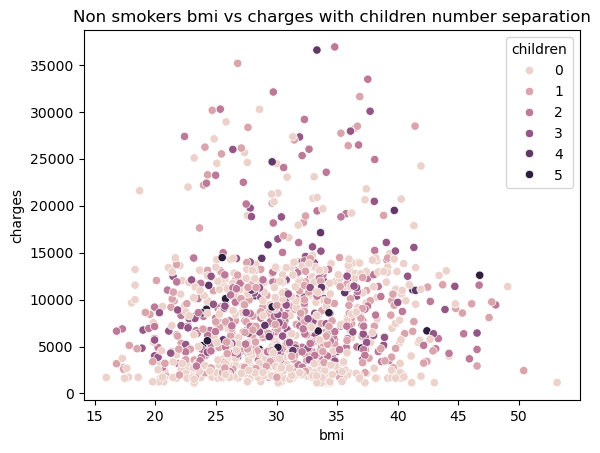

In [295]:
sns.scatterplot(data=non_smokers_data, x="bmi", y="charges", hue="children")
plt.title("Non smokers bmi vs charges with children number separation")


Text(0.5, 1.0, 'Non smokers bmi vs charges with region separation')

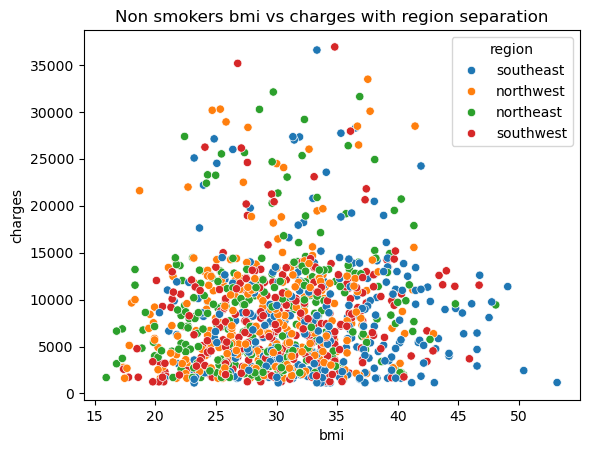

In [297]:
sns.scatterplot(data=non_smokers_data, x="bmi", y="charges", hue="region")
plt.title("Non smokers bmi vs charges with region separation")

Text(0.5, 1.0, 'Smokers bmi vs charges with children number separation')

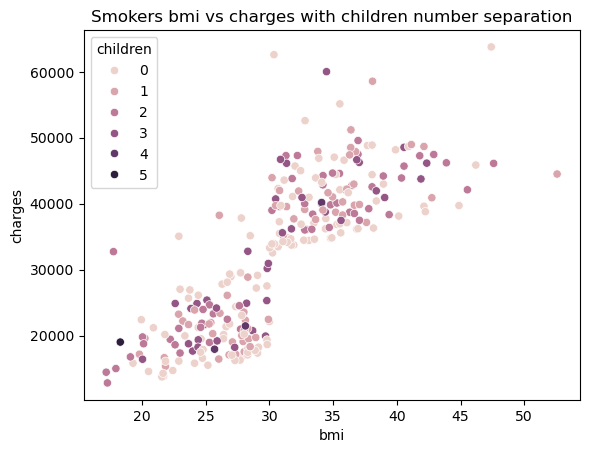

In [299]:
sns.scatterplot(data=smokers_data, x="bmi", y="charges", hue="children")
plt.title("Smokers bmi vs charges with children number separation")

Text(0.5, 1.0, 'Charges vs region')

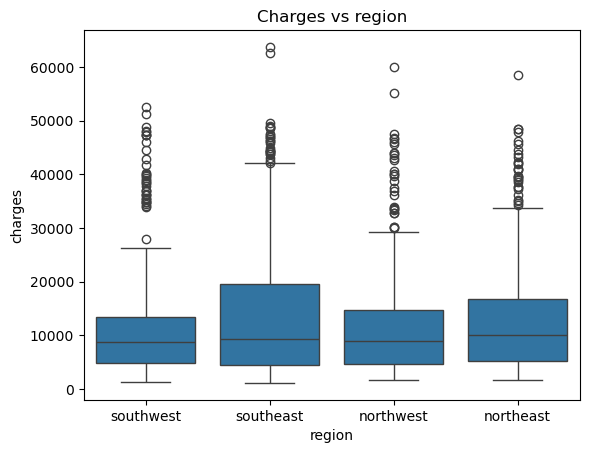

In [301]:
sns.boxplot(data=df, x="region" , y="charges")
plt.title("Charges vs region")

Text(0.5, 1.0, ' Non smokers charges vs region')

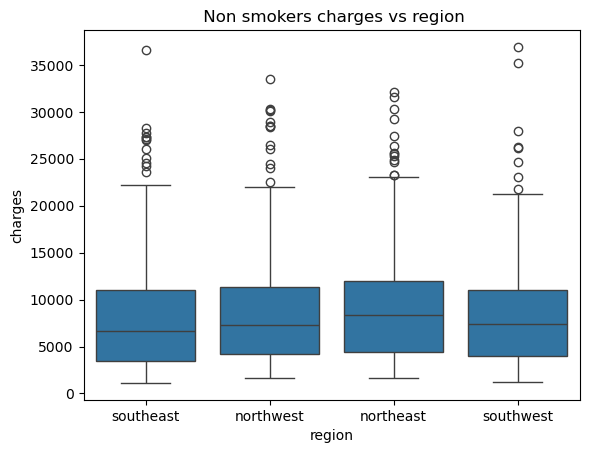

In [303]:
sns.boxplot(data=non_smokers_data, x="region" , y="charges")
plt.title(" Non smokers charges vs region")

Text(0.5, 1.0, 'Smokers charges vs region')

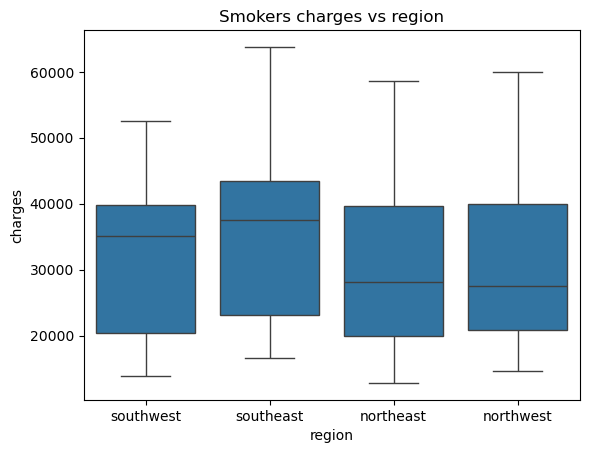

In [305]:
sns.boxplot(data=smokers_data, x="region" , y="charges")
plt.title("Smokers charges vs region")

**So the mean values of charges for smoking men are slightly larger than form smoking women. Also mean charges for smoking person in south region 
are slightly higher than for people living in the north.**

**Now lets explore some potential outliers.**

<Axes: xlabel='bmi', ylabel='charges'>

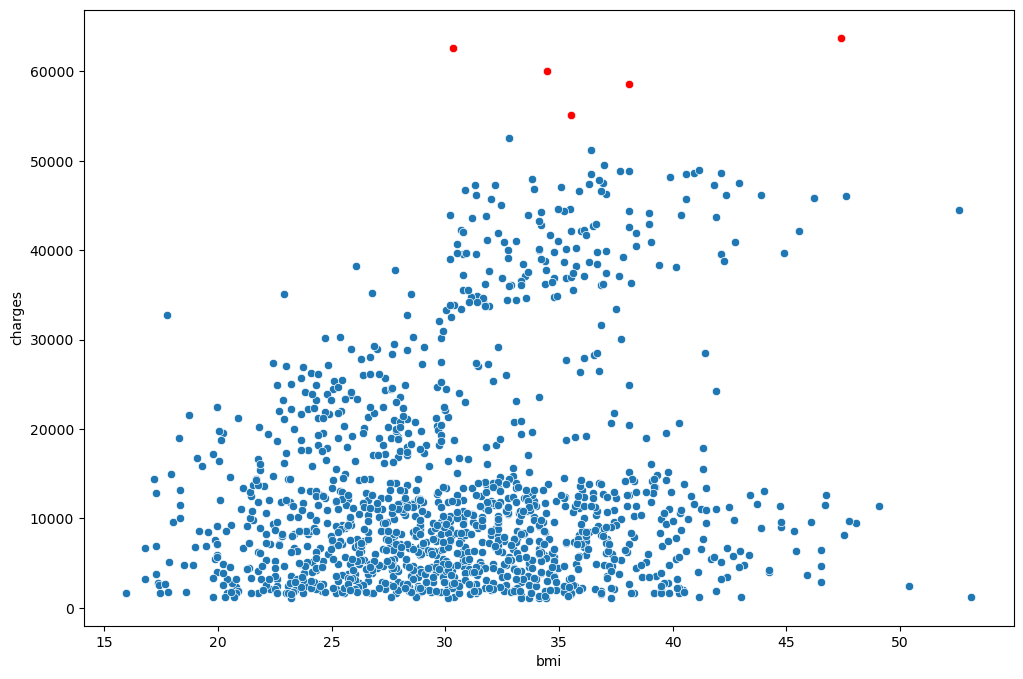

In [311]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x="bmi" , y="charges")
sns.scatterplot(data=df, x=df[df["charges"]>=55000]["bmi"], y=df[df["charges"]>=55000]["charges"], color="red")

In [313]:
df[df["charges"]>55000]

,age,sex,bmi,children,smoker,region,charges
543,54,female,47.410,0,yes,southeast,63770.42801
577,31,female,38.095,1,yes,northeast,58571.07448
819,33,female,35.530,0,yes,northwest,55135.40209
1230,52,male,34.485,3,yes,northwest,60021.39897
1300,45,male,30.360,0,yes,southeast,62592.87309


**We see that all of people with the highest insurance charges are active smokers and have obesity, because optimal BMI for adult is between 19 and 25. Due to this and the fact, that data don't tell us about other illnesses we are not going to remove that points.**

<Axes: xlabel='bmi', ylabel='charges'>

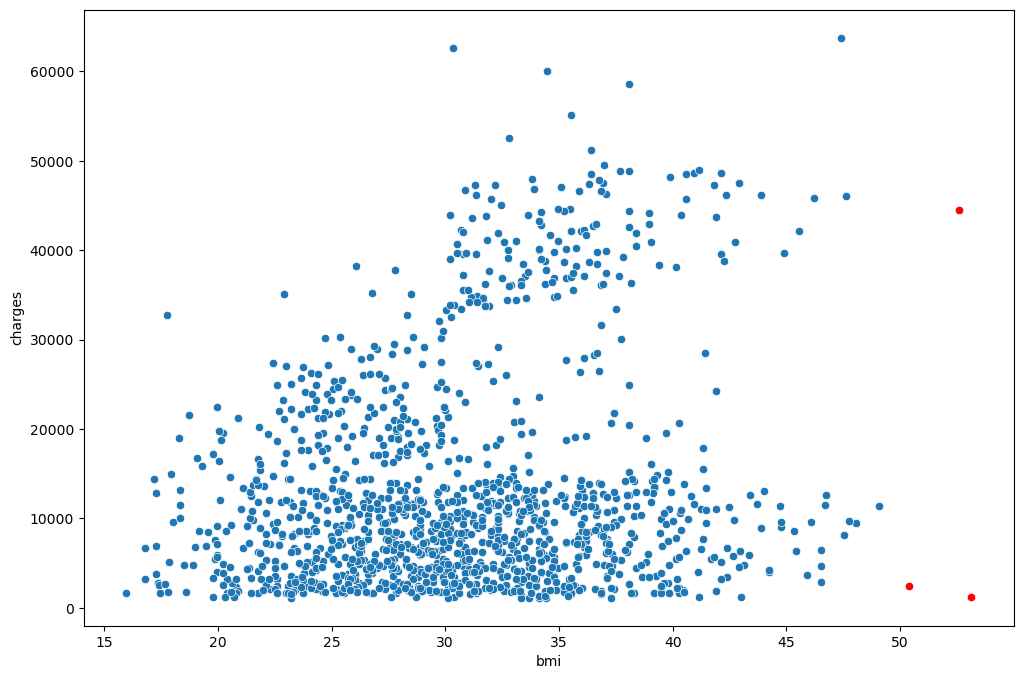

In [316]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x="bmi" , y="charges")
sns.scatterplot(data=df, x=df[df["bmi"]>=50]["bmi"], y=df[df["bmi"]>=50]["charges"], color="red")

In [318]:
df[df["bmi"]>=50]

,age,sex,bmi,children,smoker,region,charges
847,23,male,50.38,1,no,southeast,2438.0552
1047,22,male,52.58,1,yes,southeast,44501.3982
1317,18,male,53.13,0,no,southeast,1163.4627


In [320]:
df[df["bmi"]>=50].index

Index([847, 1047, 1317], dtype='int64')

<Axes: xlabel='age', ylabel='charges'>

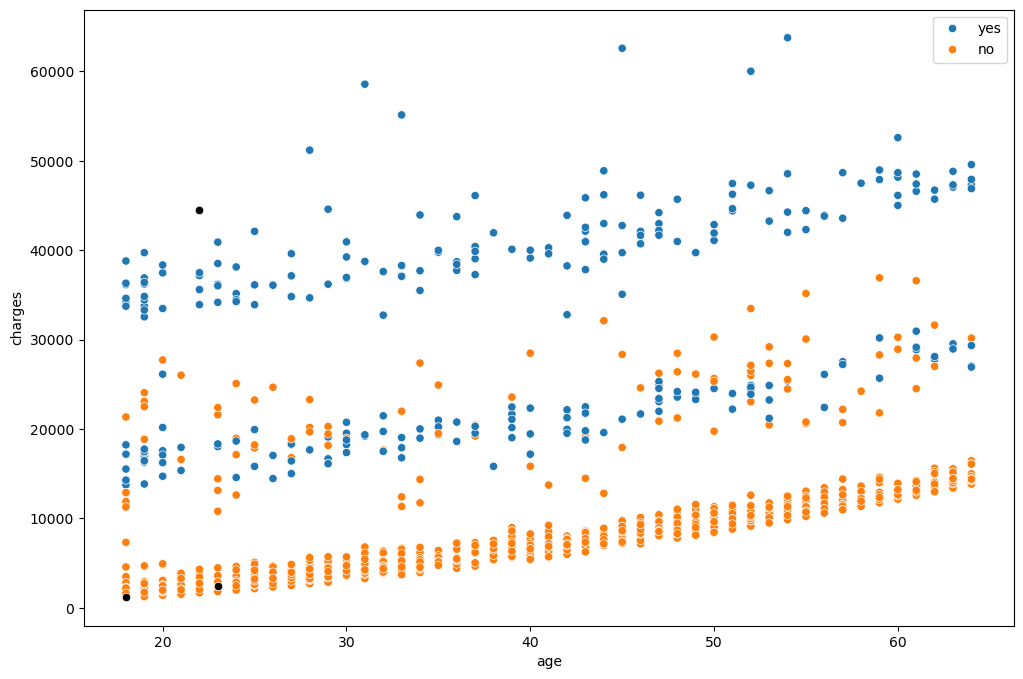

In [322]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x="age" , y="charges", hue="smoker")
sns.scatterplot(data=df, x=df[df["bmi"]>=50]["age"], y=df[df["bmi"]>=50]["charges"], color="black")

**It looks like an obesity does not have such influence as being active smoker or an age of a beneficiary**

<Axes: xlabel='age', ylabel='bmi'>

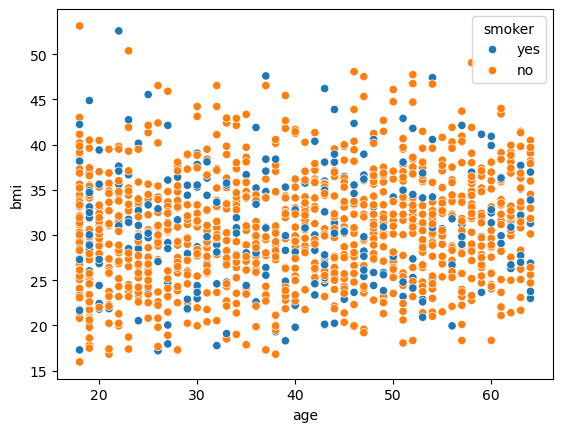

In [325]:
sns.scatterplot(data=df, x="age" , y="bmi", hue="smoker")

# We are not going to delete any data. Mainly because data were probably generated and not gained from real life.

**Now let's try to deal with categorical data.**

In [329]:
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [331]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [333]:
df_obj=df.select_dtypes(include=['object', 'category'])
df_nums=df.select_dtypes(exclude=['object', 'category'])

In [335]:
df_nums.head()

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


In [337]:
df_obj=1*pd.get_dummies(df_obj, drop_first=True)

In [339]:
df_obj.head()

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,0,1,0,0,1
1,1,0,0,1,0
2,1,0,0,1,0
3,1,0,1,0,0
4,1,0,1,0,0


In [341]:
final_df=pd.concat([df_nums,df_obj],axis=1)

In [343]:
final_df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


**We used pd.get_dummies instead of OneHotEncoder, because our data is static file. It means that we will not get a new unseen data, especially we will not receive any new labels in categorical column, which could cause problems in ML models.**


In [346]:
final_df.corr()['charges'].sort_values()

region_southwest   -0.043210
region_northwest   -0.039905
sex_male            0.057292
children            0.067998
region_southeast    0.073982
bmi                 0.198341
age                 0.299008
smoker_yes          0.787251
charges             1.000000
Name: charges, dtype: float64

**Now we are going to prepare train validation test split of our data.**

In [349]:
from sklearn.model_selection import train_test_split

In [351]:
X=final_df.drop("charges", axis=1)
y=final_df["charges"]

In [353]:
X_train, X_rest, y_train, y_rest = train_test_split(X, y, test_size=0.3, random_state=88)

In [355]:
X_validation, X_test, y_validation, y_test = train_test_split(X_rest, y_rest, test_size=0.5, random_state=88)

**First algorithm which we are going to consider is Linear Regression.**

In [358]:
from sklearn.linear_model import LinearRegression

In [360]:
help(LinearRegression)

Help on class LinearRegression in module sklearn.linear_model._base:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, copy_X=True, n_jobs=None, positive=False)
 |
 |  Ordinary least squares Linear Regression.
 |
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |
 |  copy_X : bool, default=True
 |      If True, X will be copied; else, it may be overwritten.
 |
 |  n_jobs : int, default=None
 |      The number of jobs to use for the computation. This will only provide
 |      speedu

In [362]:
LinReg=LinearRegression()

In [364]:
from sklearn.preprocessing import StandardScaler

In [366]:
Scaler=StandardScaler()

In [368]:
scaled_X_train=Scaler.fit_transform(X_train)
scaled_X_validation=Scaler.transform(X_validation)
scaled_X_test=Scaler.transform(X_test)

In [370]:
LinReg.fit(scaled_X_train, y_train)

LinearRegression()

In [372]:
LinReg_predictions=LinReg.predict(scaled_X_validation)

In [374]:
LinReg_predictions

array([32536.80920722, 37683.18778649,  9275.46173947,  3531.27533848,
       15625.25386943,  9978.21961514,  9854.20336532, 11058.32678955,
       10218.12658275,  4083.76937678, 31242.09005506, 40034.29928737,
        8977.65417965,  2390.24660417,  7776.80613597, 34105.15505691,
        3937.87095786, 32851.96824952,  4673.87491652,  3921.27533078,
        3718.02803707, 29541.16651693,  2915.10533281, -1740.55337474,
        6254.34329936, 10479.02266332,  9320.62915262,  9981.40126856,
       12640.75671474, 11183.13318069, 37515.41523181,  8801.9171155 ,
       13734.98068133,  3207.70545649,  3146.88723033,  6542.38078986,
       11450.36324606,  9080.5583676 ,  6577.18349108, 11559.74812831,
       10318.1936688 ,  4155.63026674, 24771.93939438, 29561.19031592,
        2017.22384373, 14660.35169458,  6826.31170803, 16741.79799768,
        7410.06465117, 25117.43997909, 12925.6595127 ,  7916.0113196 ,
       10999.92570465, 11239.38614419,  8306.66699422, 33333.76395531,
      

In [376]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [378]:
MAE_LinReg=mean_absolute_error(y_validation,LinReg_predictions)

In [380]:
MAE_LinReg

4032.014494901712

In [382]:
MSE_LinReg= mean_squared_error(y_validation,LinReg_predictions)

In [384]:
MSE_LinReg

34175951.95655806

In [386]:
RMSE_LinReg=np.sqrt(MSE_LinReg)

In [388]:
RMSE

5846.020180991344

In [390]:
final_df["charges"].mean()

13270.422265141257

**We see that RMSE around 5800 is not a good sign, when mean of insurance charges is 13270. It means that our model don't fit well.**

In [393]:
LINREG_BMI_values=X_validation["bmi"].values

In [395]:
LINREG_order=np.argsort(LINREG_BMI_values)
LINREG_order

array([ 23, 188, 145, 189,  22, 196, 106,  91,  66, 171,  46, 102, 122,
        49,  13, 120, 111,  84,  62, 116, 198,  75,  44,  48, 118,  20,
        94, 147, 174,  81, 158, 170, 184,  64, 139, 193, 104, 143, 108,
       126,  54, 190, 194,  82,  19,   6, 176,  16,  97, 114, 180, 130,
        10, 129, 105,  61,  90,  25,   5,  24,  96,  29, 175,  55, 136,
       167, 161,  98,  12, 142, 197, 150, 124,  42, 182,  86, 200, 141,
        18, 109,  39,  36, 117,  79,  74,   2,  31, 121,  85,  99, 148,
        70, 162,  92, 113, 156, 191,  53,  83,  27,  56,  26,  72, 199,
       132, 137, 178, 165, 112, 128,  28, 166, 185, 186, 138, 152,  35,
       160,  69, 177, 159, 100,  67,  41,   9, 133,  65, 155,  32, 154,
        37,  52,  57,  87, 140,  50,  34, 157, 144,  71,   3, 183,  63,
       173,  68,  30,  59,  33, 123,  78, 119, 187, 168,   4, 125, 135,
       192,   0,   1, 115, 153, 131,  17,  21,  38, 164,  89, 107,  93,
       181,  15,  88,  45, 195, 127,  77, 179,  80, 110,  51,   

In [397]:
LINREG_BMI_sorted=LINREG_BMI_values[LINREG_order]
LINREG_BMI_sorted

array([15.96 , 16.815, 17.4  , 17.48 , 17.86 , 18.335, 20.4  , 20.79 ,
       21.66 , 21.66 , 21.755, 21.755, 21.78 , 21.85 , 22.515, 22.705,
       22.8  , 22.88 , 23.   , 23.21 , 23.32 , 23.37 , 23.75 , 23.98 ,
       24.13 , 24.31 , 24.32 , 24.415, 24.42 , 24.51 , 24.53 , 24.7  ,
       24.795, 24.86 , 25.08 , 25.08 , 25.175, 25.3  , 25.3  , 25.46 ,
       25.6  , 25.74 , 25.74 , 25.8  , 25.84 , 25.84 , 25.84 , 26.03 ,
       26.07 , 26.315, 26.41 , 26.51 , 26.7  , 26.8  , 26.8  , 27.1  ,
       27.17 , 27.36 , 27.36 , 27.455, 27.5  , 27.5  , 27.6  , 27.645,
       27.645, 27.645, 27.7  , 27.72 , 27.83 , 27.94 , 28.   , 28.27 ,
       28.3  , 28.3  , 28.31 , 28.4  , 28.4  , 28.595, 28.595, 28.6  ,
       28.9  , 29.   , 29.15 , 29.26 , 29.26 , 29.3  , 29.48 , 29.5  ,
       29.6  , 29.64 , 29.7  , 29.735, 29.735, 29.81 , 29.83 , 29.925,
       30.02 , 30.02 , 30.115, 30.2  , 30.2  , 30.3  , 30.4  , 30.4  ,
       30.495, 30.495, 30.5  , 30.59 , 30.59 , 30.78 , 30.78 , 30.875,
      

In [399]:
LinReg_predictions[LINREG_order]

array([-1740.55337474,   187.99776144, -1131.55770849, -1713.48051807,
        2915.10533281,  7088.25380146,  1475.65948575, -1197.26039019,
       11140.09105347, 23767.6852976 ,  6826.31170803,  3069.85448358,
        -122.50940041, 25117.43997909,  2390.24660417,  7097.16222588,
        6851.97691107, 31917.33723536, 10032.73088585,  -718.03470525,
        -137.33258275, 30287.0696883 ,  2017.22384373,  7410.06465117,
        3829.41863157,  3718.02803707,  9037.32628886, 10747.40396727,
       23744.73800554,  2427.75507996, 10468.02260127, 12429.88546588,
       10093.93778601,  5780.77226945,  5361.81212526,  1737.94395211,
        3995.37287373,  9687.01192282, 28242.63841945, 12195.93307833,
        8306.66699422, 10532.27039677,  1880.08367974,  9165.4405755 ,
        3921.27533078,  9854.20336532, 32858.40726605,  3937.87095786,
       29941.38107655,  7050.83287883, 30237.31266766,  4322.4603364 ,
       31242.09005506, 10497.21884802,  3816.28243054,  1899.35302075,
      

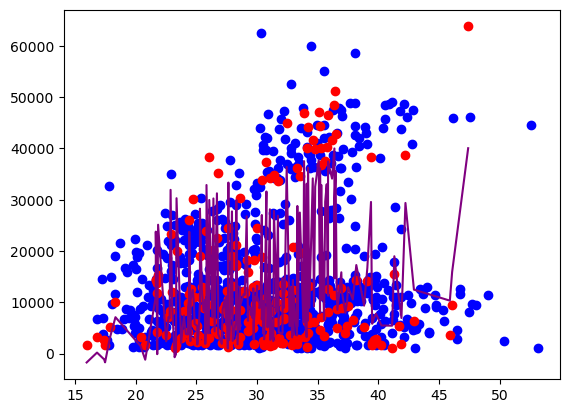

In [402]:
plt.scatter(x=X_train["bmi"],y=y_train, color="blue", label="Actual")
plt.scatter(x=LINREG_BMI_sorted,y=y_validation.values[LINREG_order], color="red", label="Validation")
plt.plot(LINREG_BMI_sorted, LinReg_predictions[LINREG_order], color="purple")

**Above it is a showcase, that linear regression model for many features doesn't return straight line in 2D scatter plots. The reason is that our model is built for many variables, and we get the "straight line" in n-dimensional chart, which is not able to draw in our case. This what we see is a projection from n-dimensions to 2D.**

**Much better option is to draw predicted values and compare them to the real ones.**

In [406]:
x=np.linspace(0,60000,60000)



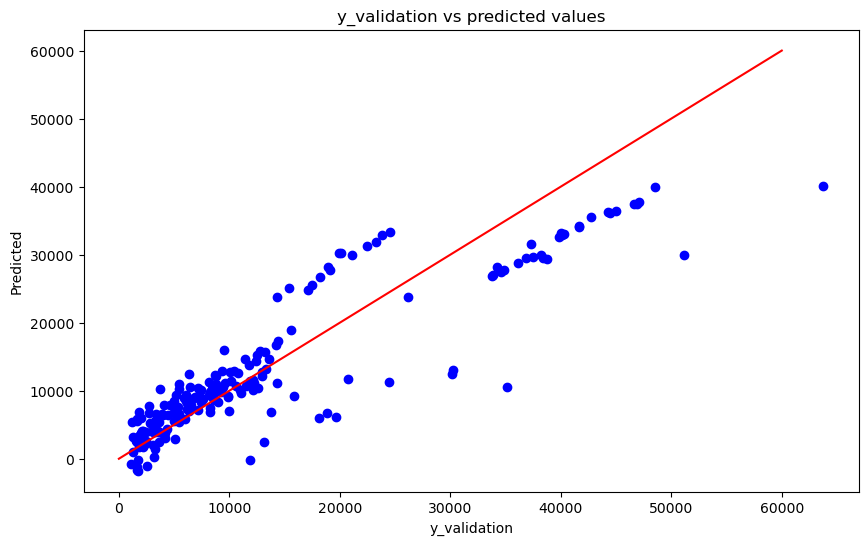

In [408]:
plt.figure(figsize=(10,6))
plt.scatter(x=y_validation, y=LinReg_predictions, color="blue")
plt.title("y_validation vs predicted values")
plt.xlabel("y_validation")
plt.ylabel("Predicted")
plt.plot(x,x, color="red")

In [410]:
Res=LinReg_predictions-y_validation

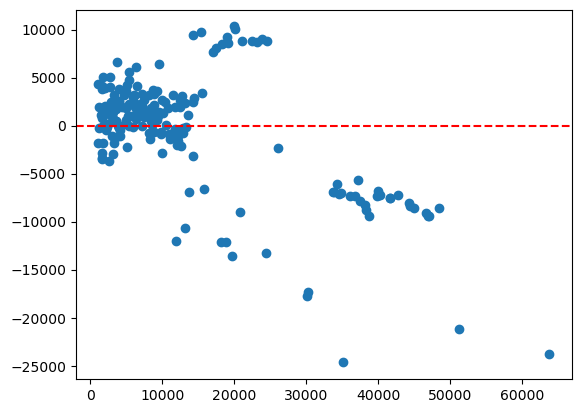

In [412]:
plt.scatter(x=y_validation, y=Res)
plt.axhline(y=0, color="red", linestyle='--')

**Residuals are not randomly distributed. We see clear trends. This confirms us, that Linear Regression does not fill well for solving this problem.**

# In this chapter we will dive into Polynoial Regression

At the beggining we need to change our features and then scale them. This is because if we scale the features first, we will likely create some negative numbers. Changing the features to a higher dimension will create even degrees of the polynomial. As a result, the negative numbers will turn positive, completely distorting the information about the data.

In [417]:
train_rmse_errors=[]
validation_rmse_errors=[]

We are going to use the Elbow method to figure out which degree of the polynomial fit the best.

In [420]:
from sklearn.preprocessing import PolynomialFeatures
Scaler2=StandardScaler()

In [422]:
for d in range(1,10):
    Poly_converter=PolynomialFeatures(degree=d, include_bias=True)
    X_poly=Poly_converter.fit_transform(X)
    X_Ptrain, X_Prest, y_Ptrain, y_Prest = train_test_split(X_poly, y, test_size=0.3, random_state=88)
    X_Pvalidation, X_Ptest, y_Pvalidation, y_Ptest = train_test_split(X_Prest, y_Prest, test_size=0.5, random_state=88)
    scaled_X_Ptrain=Scaler2.fit_transform(X_Ptrain)
    scaled_X_Pvalidation=Scaler2.transform(X_Pvalidation)
    scaled_X_Ptest=Scaler2.transform(X_Ptest)
    PolyReg=LinearRegression()
    PolyReg.fit(scaled_X_Ptrain, y_Ptrain)
    train_pred=PolyReg.predict(scaled_X_Ptrain)
    validation_pred=PolyReg.predict(scaled_X_Pvalidation)
    train_rmse=np.sqrt(mean_squared_error(y_Ptrain, train_pred))
    validation_rmse=np.sqrt(mean_squared_error(y_Pvalidation, validation_pred))
    train_rmse_errors.append(train_rmse)
    validation_rmse_errors.append(validation_rmse)

    

In [426]:
train_rmse_errors

[6088.910369821243,
 4818.282617451565,
 4931.389068198351,
 4181.38807451646,
 3364.916159575733,
 2569.6585876672234,
 1626.7723831897586,
 1803.7365658389483,
 288.94982424984556]

In [428]:
validation_rmse_errors

[5846.0201809913415,
 4202.348648608166,
 5119.616672105435,
 6335.534474676116,
 15684.246878768105,
 49052219628991.414,
 15042700730984.135,
 169935966695150.25,
 34876745036.88748]

In [430]:
Dict={'train_rmse_errors':train_rmse_errors , 'validation_rmse_errors':validation_rmse_errors}

In [438]:
Elbow_df=pd.DataFrame(Dict)
Elbow_df

,train_rmse_errors,validation_rmse_errors
0,6088.910370,5.846020e+03
1,4818.282617,4.202349e+03
2,4931.389068,5.119617e+03
3,4181.388075,6.335534e+03
4,3364.916160,1.568425e+04
5,2569.658588,4.905222e+13
6,1626.772383,1.504270e+13
7,1803.736566,1.699360e+14
8,288.949824,3.487675e+10


In [440]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [442]:
Elbow_df

,train_rmse_errors,validation_rmse_errors
0,6088.91,5846.02
1,4818.28,4202.35
2,4931.39,5119.62
3,4181.39,6335.53
4,3364.92,15684.25
5,2569.66,49052219628991.41
6,1626.77,15042700730984.13
7,1803.74,169935966695150.25
8,288.95,34876745036.89


In [462]:
Elbow_df.index.to_list()

[0, 1, 2, 3, 4, 5, 6, 7, 8]

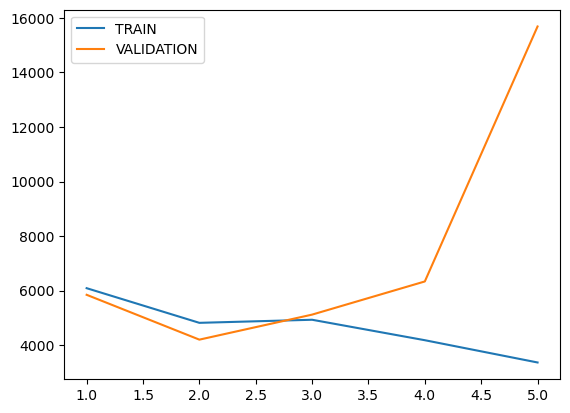

In [480]:
plt.plot(range(1,6), train_rmse_errors[:5], label="TRAIN")
plt.plot(range(1,6), validation_rmse_errors[:5], label="VALIDATION")
plt.legend()

In [496]:
train_rmse_errors=[]
validation_rmse_errors=[]
for d in range(1,10):
    Poly_converter=PolynomialFeatures(degree=d, include_bias=False)
    X_poly=Poly_converter.fit_transform(X)
    X_Ptrain, X_Prest, y_Ptrain, y_Prest = train_test_split(X_poly, y, test_size=0.3, random_state=88)
    X_Pvalidation, X_Ptest, y_Pvalidation, y_Ptest = train_test_split(X_Prest, y_Prest, test_size=0.5, random_state=88)
    scaled_X_Ptrain=Scaler2.fit_transform(X_Ptrain)
    scaled_X_Pvalidation=Scaler2.transform(X_Pvalidation)
    scaled_X_Ptest=Scaler2.transform(X_Ptest)
    PolyReg=LinearRegression()
    PolyReg.fit(scaled_X_Ptrain, y_Ptrain)
    train_pred=PolyReg.predict(scaled_X_Ptrain)
    validation_pred=PolyReg.predict(scaled_X_Pvalidation)
    train_rmse=np.sqrt(mean_squared_error(y_Ptrain, train_pred))
    validation_rmse=np.sqrt(mean_squared_error(y_Pvalidation, validation_pred))
    train_rmse_errors.append(train_rmse)
    validation_rmse_errors.append(validation_rmse)

In [498]:
train_rmse_errors

[6088.910369821244,
 4923.821306693522,
 4571.150318387222,
 4182.084373293974,
 3370.5145835164158,
 2525.3210114833746,
 1600.011554026948,
 781.652425329532,
 288.9521544071751]

In [500]:
validation_rmse_errors

[5846.020180991345,
 4358.61276005756,
 4843.646366988291,
 6338.336698588164,
 15660.48175210906,
 16168590760569.426,
 802534784836.4327,
 1843902275283.1565,
 24701423800.29994]

**From Elbow method we conclude that possible degrees are 2 or 3. At 4 chart for VALIDATION errors starts to grow really fast and that means overfitting of our model. We choose degree equals 2, because error value is lower than for degree 3 and model is less complicated. We also considered include_bias=True parameter, but it didn't give better results.**

In [486]:
Scaler3=StandardScaler()
Poly_converter=PolynomialFeatures(degree=2, include_bias=True)
X_poly=Poly_converter.fit_transform(X)
X_Ptrain, X_Prest, y_Ptrain, y_Prest = train_test_split(X_poly, y, test_size=0.3, random_state=88)
X_Pvalidation, X_Ptest, y_Pvalidation, y_Ptest = train_test_split(X_Prest, y_Prest, test_size=0.5, random_state=88)
scaled_X_Ptrain=Scaler3.fit_transform(X_Ptrain)
scaled_X_Pvalidation=Scaler3.transform(X_Pvalidation)
scaled_X_Ptest=Scaler3.transform(X_Ptest)
PolyReg=LinearRegression()
PolyReg.fit(scaled_X_Ptrain, y_Ptrain)
validation_pred=PolyReg.predict(scaled_X_Pvalidation)
validation_rmse=np.sqrt(mean_squared_error(y_Pvalidation, validation_pred))

In [488]:
validation_rmse

4202.348648608166

In [490]:
ResP=y_Pvalidation-validation_pred

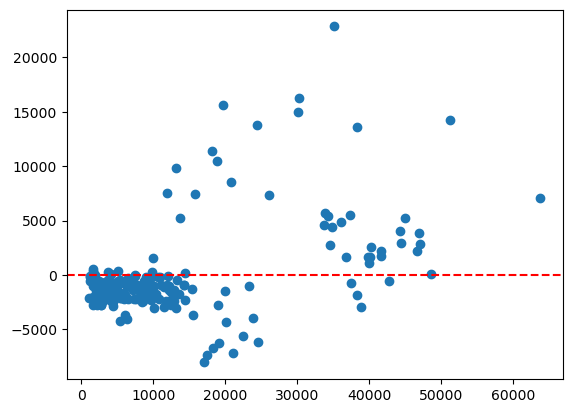

In [513]:
plt.scatter(x=y_Pvalidation, y=ResP)
plt.axhline(y=0, color="red", linestyle='--')

Text(0, 0.5, 'Predicted')

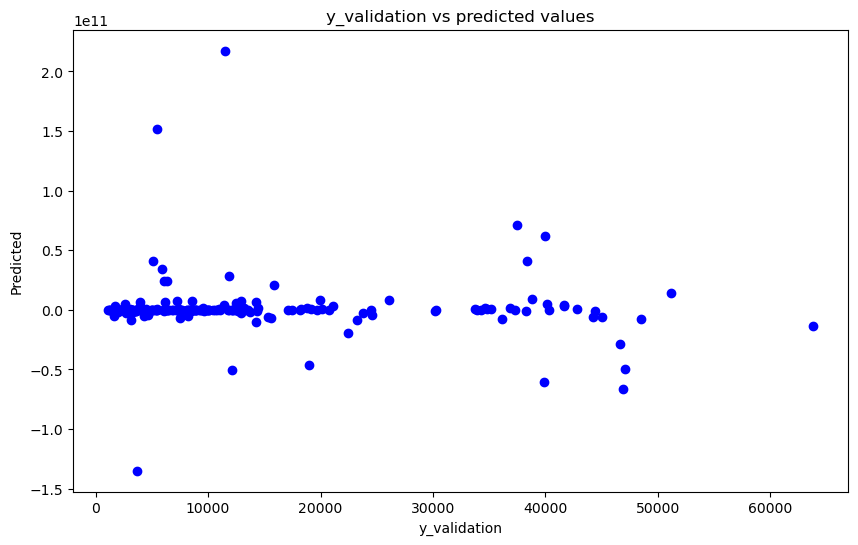

In [515]:
plt.figure(figsize=(10,6))
plt.scatter(x=y_Pvalidation, y=validation_pred, color="blue")
plt.title("y_validation vs predicted values")
plt.xlabel("y_validation")
plt.ylabel("Predicted")


**We clearly see that Polynomial Regression with degree=2 works better**